In [61]:
%matplotlib inline
import numpy as np
import pandas as pd
import sys
import math
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV,ElasticNetCV
from pyentrp import entropy as pyent
import EntropyHub as EH
import neurokit2 as nk
import random
import sampen
import requests
import io
from pprint import pprint
import os
from sklearn import preprocessing
from influxdb_client import InfluxDBClient, Point
from influxdb_client.client.write_api import SYNCHRONOUS
from influxdb_client.client.flux_table import FluxTable
from datetime import datetime, timedelta
from typing import List
import itertools
from datetime import datetime
from datetime import timedelta
import itertools
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def plot_spectrum(s):
    f = np.fft.rfftfreq(len(s))
    return plt.loglog(f, np.abs(np.fft.rfft(s)))[0]

def noise_psd(N, psd = lambda f: 1):
    X_white = np.fft.rfft(np.random.randn(N));
    S = psd(np.fft.rfftfreq(N))
    # Normalize S
    S = S / np.sqrt(np.mean(S**2))
    X_shaped = X_white * S;
    return np.fft.irfft(X_shaped);

def PSDGenerator(f):
    return lambda N: noise_psd(N, f)

@PSDGenerator
def white_noise(f):
    return 1;

@PSDGenerator
def blue_noise(f):
    return np.sqrt(f);

@PSDGenerator
def violet_noise(f):
    return f;

@PSDGenerator
def brownian_noise(f):
    return 1/np.where(f == 0, float('inf'), f)

@PSDGenerator
def pink_noise(f):
    return 1/np.where(f == 0, float('inf'), np.sqrt(f))

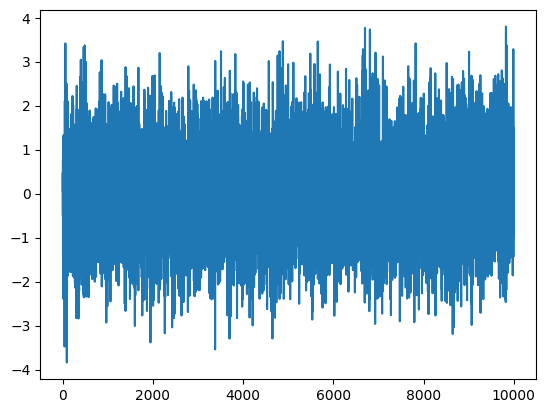

In [19]:
plt.plot(white_noise(10000))

In [63]:
white_noise_01 = white_noise(10000)

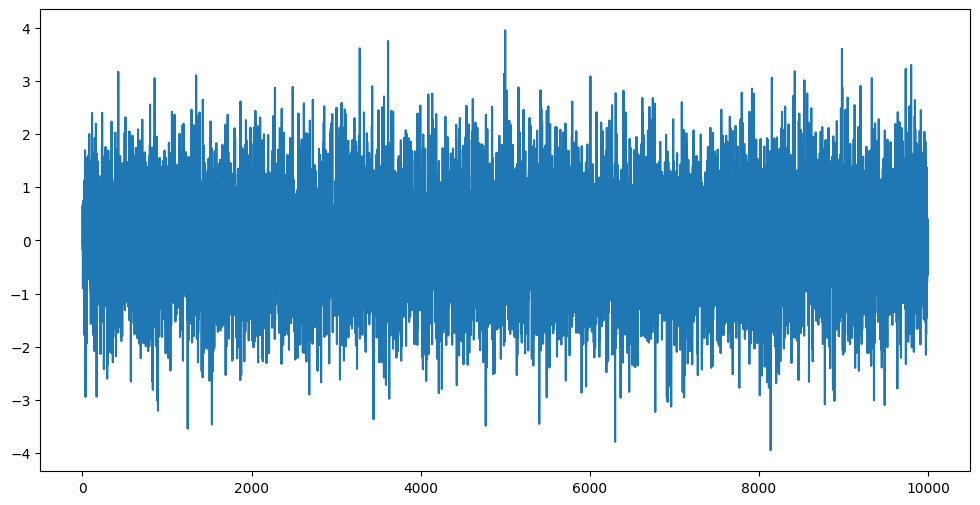

In [34]:
plt.figure(figsize=(12,6))
plt.plot(white_noise_01)
plt.savefig("white_noise.png")

In [2]:
example01 = [x + 1000 + random.uniform(100, -100) for x in np.arange(10000)]

In [3]:
example01

[1061.9215275931901,
 950.3397642228158,
 1007.3130813735975,
 1074.561215047512,
 1083.3837071340006,
 981.3549591355359,
 1036.362895594081,
 986.0612666599789,
 915.2540961635616,
 943.5975130795284,
 1033.0682489976082,
 930.3329649983266,
 917.7593877844029,
 1030.4512230956918,
 1064.7454765216035,
 1055.407646255287,
 1029.1174686168447,
 920.1200512117055,
 929.330034351102,
 941.7948910546012,
 1086.7092148905417,
 934.6076959887436,
 1108.9932236706773,
 1010.2867355212193,
 934.9538070444964,
 1025.664266644338,
 1039.2361298651765,
 1123.6930110931257,
 1096.852559865427,
 943.0197916379184,
 1046.2012563614803,
 1053.4377592307246,
 1038.2242473443496,
 1118.74337743675,
 1072.5844499874822,
 1047.9958255372833,
 1090.2756348772489,
 975.7015781753754,
 993.6242033841195,
 1137.481209926452,
 1109.7911206054398,
 1024.7246214904046,
 964.8195735761828,
 1001.7834501637014,
 1040.9748778369262,
 1027.3096014662506,
 979.9463912770266,
 962.618946285296,
 967.0566378815284,


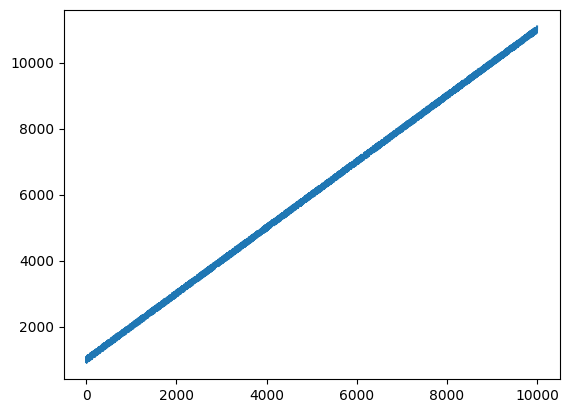

In [4]:
plt.plot(example01)

In [64]:
def sampen_loop(ser: List[float], batch_size = 50) -> List[float]:
    return [nk.entropy_sample(np.array(ser[index-batch_size:index]))[0] for index in range(len(ser))[batch_size:]]

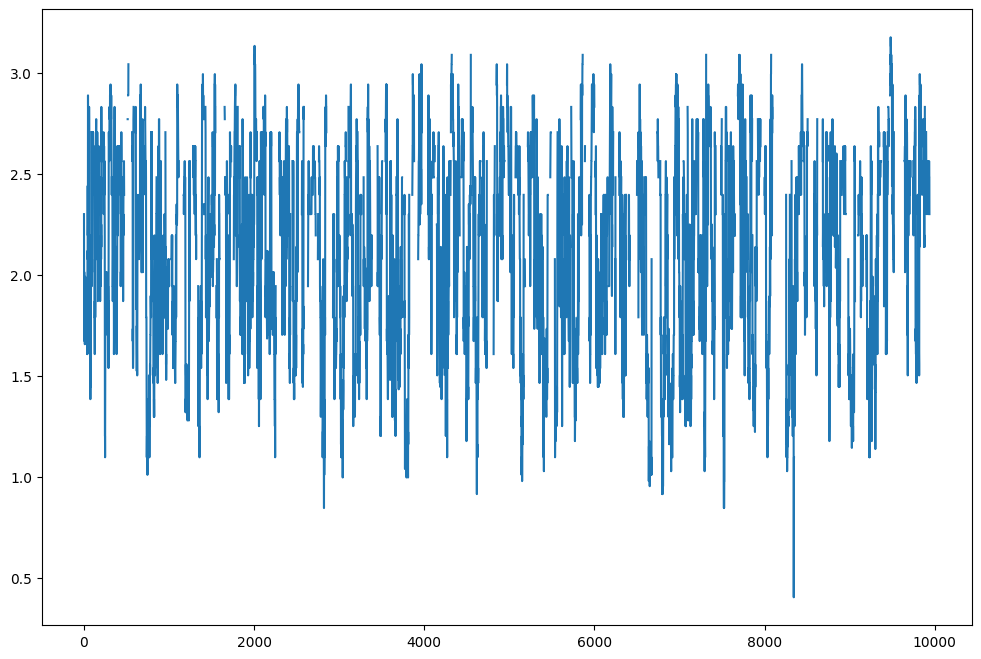

In [68]:
ex_samplen = sampen_loop(example01)
plt.figure(figsize=(12, 8))
plt.plot(ex_samplen)
plt.savefig("white_noise_sampen.png")

In [9]:
len(list(filter(lambda x: x == np.inf or x == -np.inf, ex_samplen)))

3024

In [10]:
def fuzzy_loop(ser: List[float], batch_size = 50) -> List[float]:
    return [nk.entropy_fuzzy(np.array(ser[index-batch_size:index]))[0] for index in range(len(ser))[batch_size:]]

In [16]:
len(list(filter(lambda x: x == np.inf or x == -np.inf, fuzzy_loop(white_noise_01))))

0

In [22]:
len(list(filter(lambda x: x == np.inf or x == -np.inf, sampen_loop(white_noise_01))))

2590

In [23]:
def ap_loop(ser: List[float], batch_size = 50) -> List[float]:
    return [nk.entropy_approximate(np.array(ser[index-batch_size:index]))[0] for index in range(len(ser))[batch_size:]]

In [59]:
len(list(filter(lambda x: x == np.inf or x == -np.inf, ap_loop(white_noise_01))))

0

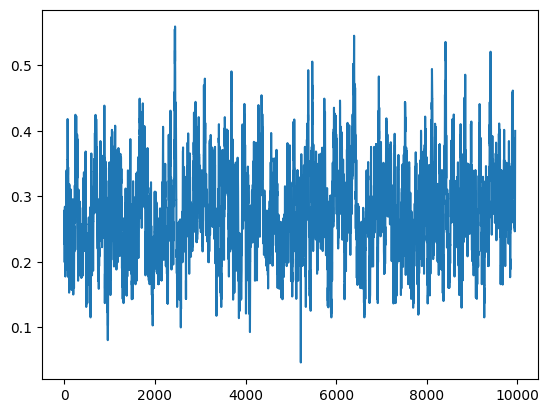

In [60]:
plt.plot(ap_loop(white_noise_01))

In [25]:
def range_ap_loop(ser: List[float], batch_size = 50) -> List[float]:
    return [nk.entropy_range(np.array(ser[index-batch_size:index]), approximate=True)[0] for index in range(len(ser))[batch_size:]]

In [35]:
def range_samp_loop(ser: List[float], batch_size = 50) -> List[float]:
    return [nk.entropy_range(np.array(ser[index-batch_size:index]), approximate=False)[0] for index in range(len(ser))[batch_size:]]

In [42]:
len(list(filter(lambda x: x == np.inf or x == -np.inf or x == float('nan'), range_ap_loop(white_noise_01))))

/Users/nnao45/.ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.8/site-packages/neurokit2/complexity/utils.py:56: RuntimeWarning: divide by zero encountered in log
  phi[0] = np.mean(np.log(count1 / embedded1.shape[0]))
/Users/nnao45/.ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.8/site-packages/neurokit2/complexity/utils.py:57: RuntimeWarning: divide by zero encountered in log
  phi[1] = np.mean(np.log(count2 / embedded2.shape[0]))
/Users/nnao45/.ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.8/site-packages/neurokit2/complexity/optim_complexity_tolerance.py:372: RuntimeWarning: invalid value encountered in subtract
  return np.abs(np.subtract(phi[0], phi[1])), info


942

In [41]:
len(list(filter(lambda x: x == np.inf or x == -np.inf or x == np.nan, range_samp_loop(white_noise_01))))

0

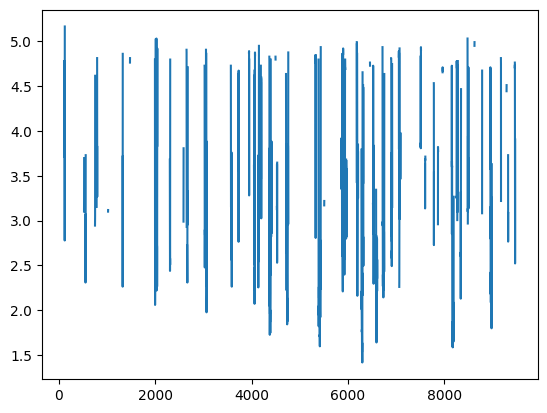

In [37]:
plt.plot(range_samp_loop(white_noise_01))

In [38]:
ex_range_samp = range_samp_loop(white_noise_01)

In [51]:
ex_range_ap = range_ap_loop(white_noise_01)

/Users/nnao45/.ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.8/site-packages/neurokit2/complexity/utils.py:56: RuntimeWarning: divide by zero encountered in log
  phi[0] = np.mean(np.log(count1 / embedded1.shape[0]))
/Users/nnao45/.ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.8/site-packages/neurokit2/complexity/utils.py:57: RuntimeWarning: divide by zero encountered in log
  phi[1] = np.mean(np.log(count2 / embedded2.shape[0]))
/Users/nnao45/.ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.8/site-packages/neurokit2/complexity/optim_complexity_tolerance.py:372: RuntimeWarning: invalid value encountered in subtract
  return np.abs(np.subtract(phi[0], phi[1])), info


In [46]:
ex_range_samp

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 4.77912349311153,
 3.7135720667043075,
 nan,
 nan,
 nan,
 nan,
 3.864232341591798,
 3.9053340172773496,
 3.1103356562929947,
 2.7782544597754586,
 3.230239583518516,
 5.1647859739235145,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 n

In [50]:
len(list(filter(lambda x: x == np.inf or x == -np.inf or math.isnan(x), ex_range_samp)))

9159

In [52]:
len(list(filter(lambda x: x == np.inf or x == -np.inf or math.isnan(x), ex_range_ap)))


9950

In [49]:
math.isnan(ex_range_samp[0])

True

In [55]:
def dist_loop(ser: List[float], batch_size = 50) -> List[float]:
    return [nk.entropy_distribution(np.array(ser[index-batch_size:index]))[0] for index in range(len(ser))[batch_size:]]

In [56]:
ex_dist = dist_loop(white_noise_01)

In [57]:
len(list(filter(lambda x: x == np.inf or x == -np.inf or math.isnan(x), ex_dist)))

0

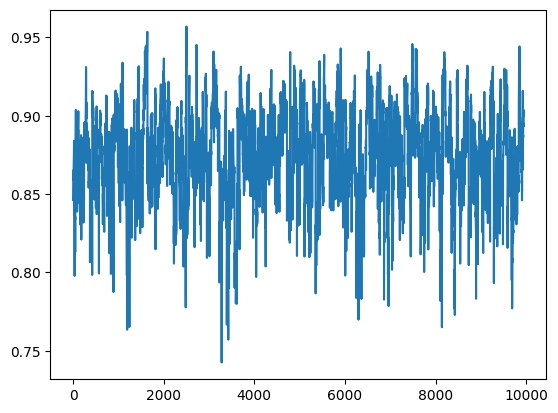

In [58]:
plt.plot(ex_dist)